# Teste de Hipótese para a Média (uma variável)

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [22]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_1samp,ttest_ind, ttest_rel,f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# read data
df = pd.read_csv(r'C:\Users\aurel\OneDrive\Documentos\Estudo\Sirius\1 - Estatistica descritiva I\S2D5\Data\ideb.csv',
            usecols = ['ano',
                       'sigla_uf',
                       'taxa_aprovacao',
                       'nota_saeb_matematica',
                       'nota_saeb_lingua_portuguesa',
                       'ideb'])

### Atividade 2: Verifique quantas linhas e colunas possui esse dataframe. Veja também se há dados faltantes.

In [3]:
print(f'O dataframe possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataframe possui 130194 linhas e 6 colunas.


In [4]:
# show nan values
df.isna().sum()

ano                                0
sigla_uf                           0
taxa_aprovacao                 26736
nota_saeb_matematica           41849
nota_saeb_lingua_portuguesa    41849
ideb                           29825
dtype: int64

In [5]:
#drop nan values
df2 = df.dropna()

### Atividade 3: Teste a hipótese de a média da taxa de aprovação para o ano de 2005 ser igual a 78. Considere um nível de confiança de 95%.

Descreva, sucintamente, o resultado do teste de hipótese. Não esqueça de incluir as estatísticas encontradas.

Dica: crie um DataFrame somente com os valores do ano e da variável de interesse.


In [6]:
#slice dataframe
df2005 = df2.query('ano == 2005')[['taxa_aprovacao']]

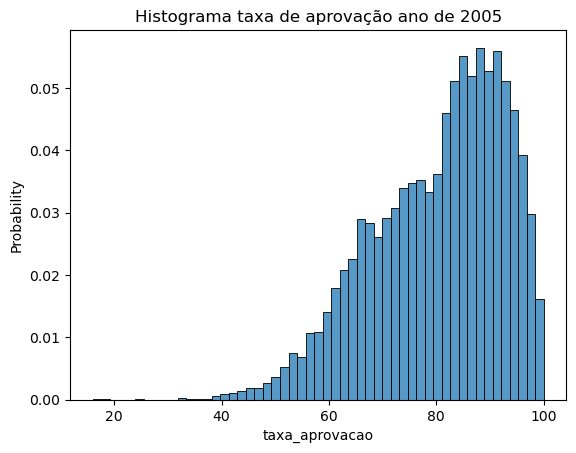

In [7]:
#histplot taxa de aprovacao
ax = sns.histplot(data = df2005,
                  x = 'taxa_aprovacao',
                  stat = 'probability')
ax.set(title = "Histograma taxa de aprovação ano de 2005")
plt.show()

$$H_0: \mu = 78$$
$$H_a: \mu \neq 78$$

In [8]:
ttest_1samp(a = df2005['taxa_aprovacao'], 
            popmean=78,
            alternative = 'two-sided')

Ttest_1sampResult(statistic=20.890080427394643, pvalue=3.1469508067020596e-95)

* **Devido ao p_value ser inferior à 0.05 rejeita-se a hipótese nula (H0: u = 78) e aceita-se a hipÓtese alternativa (Ha: u != 78)**

In [9]:
np.mean(df2005.taxa_aprovacao)

80.33077050401401

# Teste de Hipótese para a Média (duas variáveis independentes)

Agora vamos aplicar um teste de hipótese para a média de duas populações independentes usando dados reais. Desejamos saber se a média para ambas é a mesma.

### Atividade 4: Teste a hipótese de a média do IDEB para os estados do Rio Grande do Sul e do Ceará, no ano de 2019, serem iguais. Considere um nível de confiança de 95%

Dica: Primeiro crie um dataframe auxiliar contendo apenas os dados referentes a 2019. Depois selecione dois conjunto de valores de IDEB, um apenas para o estado do Rio Grande do Sul e outro apenas para o estado do Ceará.

In [10]:
#Slice dataframe
dfrs =  df2.query('ano == 2019 & sigla_uf == "RS"')
dfce =  df2.query('ano == 2019 & sigla_uf == "CE"')

In [11]:
ttest_ind(dfrs['ideb'],dfce['ideb'], equal_var = False)

Ttest_indResult(statistic=-3.9541302761146584, pvalue=8.673400907588078e-05)

* **Devido a p_value ser inferior a 0.05 então rejeita-se a hipótese nula H0 (média RS = média CE) e aceita-se a hipótese alternativa Ha (média RS != média CE)**

### Atividade 5: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB dos dois estados.

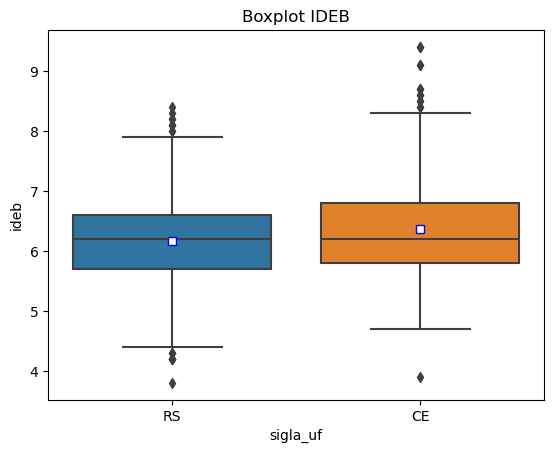

In [12]:
ax = sns.boxplot(x = pd.concat([dfrs,dfce])['sigla_uf'], 
                 y = pd.concat([dfrs,dfce])['ideb'],
                 showmeans = True,
                 meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})

ax.set(title='Boxplot IDEB')
plt.show()

In [13]:
print('No gráfico acima é possível identificar pelos triângulos verdes que as médias são diferentes.')
print(f'A média do IDEB do Rio Grande do Sul é: {np.mean(dfrs.ideb)}\nA média do IDEB do Ceará é: {np.mean(dfce.ideb)}')

No gráfico acima é possível identificar pelos triângulos verdes que as médias são diferentes.
A média do IDEB do Rio Grande do Sul é: 6.158818263204958
A média do IDEB do Ceará é: 6.356836461125973


### Atividade 6: Teste a hipótese de a média do IDEB para os anos de 2005 e 2019 serem iguais. Considere um nível de confiança de 95%

Dica: Crie dois dataframes auxiliares e selecione 300 linhas de cada um apenas (sem conter valores faltantes) para realizar o teste.

In [14]:
df2005 = df2.query('ano ==2005')[:300]
df2019 = df2.query('ano ==2019')[:300]

In [15]:
ttest_rel(df2005['ideb'],df2019['ideb'])

Ttest_relResult(statistic=-163.87518962388705, pvalue=8.329734374233758e-295)

* **Devido ao p_value ser inferior a 0.05 rejeit-se a hipótese nula H0(IDEB 2019 = IDEB 2005) e aceita-se a hipótese alternativa H1 (IDEB2019 != IDEB 2005)**


### Atividade 7: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB para os dois anos.

In [16]:
# create var to simplify plot
df2005['alt'] = 2005
df2019['alt'] = 2019

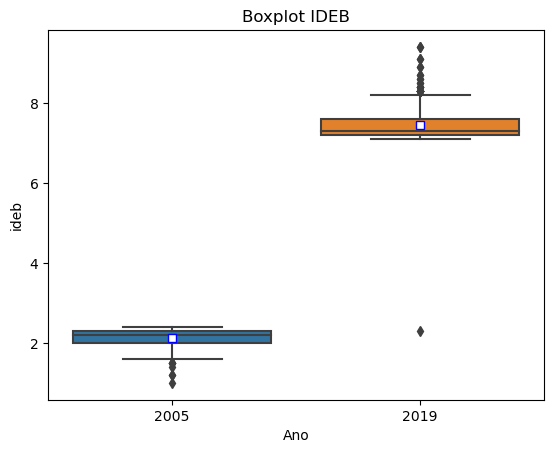

In [17]:
ax = sns.boxplot(x = pd.concat([df2005,df2019])['alt'], 
                 y = pd.concat([df2005,df2019])['ideb'],
                 showmeans = True,
                 meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})

ax.set(title='Boxplot IDEB',
       xlabel = 'Ano')
plt.show()

* **No gráfico podemos analisar que a média do IDEB dos anos de 2005 e 2019 são distanstes**

# Análise de Variância (ANOVA) One-Way

### Atividade 8: Vamos comparar a média do IDEB para os três estados da região sul, em 2019, para ver se estas médias podem ser consideradas iguais. Considere um nível de confiança de 95%.

Dica: Crie três dataframes auxiliares, um para cada estado.

In [18]:
dfrs = df2.query('ano == 2019 & sigla_uf == "RS"')
dfpr = df2.query('ano == 2019 & sigla_uf == "PR"')
dfsc = df2.query('ano == 2019 & sigla_uf == "SC"')

In [19]:
f_oneway(dfrs.ideb,
         dfpr.ideb,
         dfsc.ideb)

F_onewayResult(statistic=27.712354138245196, pvalue=1.2331589284254783e-12)

* **Devido ao p_value ser inferior 0.05 rejeita-se hipótese nula H0 (média IDEB para os três estados da região sul serem iguais) e aceita-se a hipótese alternativa Ha (média IDEB para os três estados da região sul são ao menos uma diferente)**

### Atividade 9: Faça um boxplot para entender melhor o que está acontecendo com os valores do IDEB para os três estados.

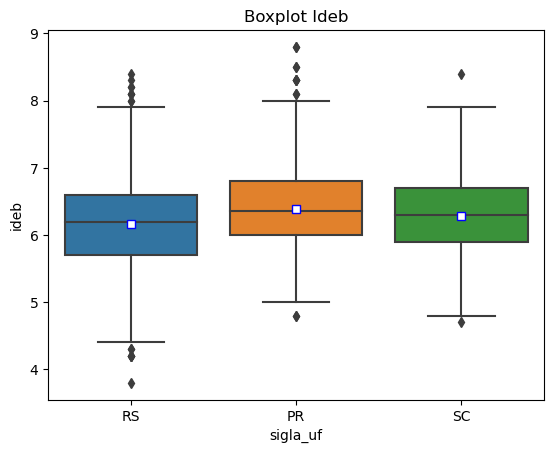

In [20]:
ax = sns.boxplot(x = pd.concat([dfrs,dfpr,dfsc]).sigla_uf,
                 y = pd.concat([dfrs,dfpr,dfsc]).ideb,
                 showmeans = True,
                 meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
ax.set(title = 'Boxplot Ideb');

* **Gráficamente as médias dos estados possuem valores próximos, mas não iguais**

### Atividade 10: Faça um teste Post-hoc para verificar se de fato é o estado de Santa Catarina tem média diferente dos demais estados.

In [24]:
print(pairwise_tukeyhsd(endog = pd.concat([dfrs,dfpr,dfsc]).ideb,
                        groups = pd.concat([dfrs,dfpr,dfsc]).sigla_uf,
                        alpha = 0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    PR     RS  -0.2294    0.0  -0.302 -0.1568   True
    PR     SC  -0.1123 0.0035 -0.1936  -0.031   True
    RS     SC   0.1171 0.0009  0.0414  0.1928   True
----------------------------------------------------


* **Todos são diferentes entre si pois o valor do reject apresentado é verdadeiro**